In [1]:
# Import external libraries
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

In [2]:
# Analyze reliability, bandwidth, energy
data = []
datadir = "data/CHIP6"
for bpc in range(1, 3):
    for att in range(10, 250, 20):
        # Load and compute data
        postread = np.loadtxt(f"{datadir}/postread_{bpc}bpc_{att}.csv", delimiter=',', dtype=np.int8)
        postread_cer = np.not_equal(postread, [[i % (2**bpc) for i in range(16)]]*65536).mean()
        dt = np.loadtxt(f"{datadir}/dt_{bpc}bpc_{att}.csv", delimiter=',')
        ivdd = np.loadtxt(f"{datadir}/vdd_power_{bpc}bpc_{att}.csv", delimiter=',')
        ivdd_dac = np.loadtxt(f"{datadir}/vdd_power_{bpc}bpc_{att}.csv", delimiter=',')
        ivsa = np.loadtxt(f"{datadir}/vsa_power_{bpc}bpc_{att}.csv", delimiter=',')
        ivddio = np.loadtxt(f"{datadir}/vddio_power_{bpc}bpc_{att}.csv", delimiter=',')
        ivddio_dac = np.loadtxt(f"{datadir}/vddio_power_{bpc}bpc_{att}.csv", delimiter=',')
        power_tot = ivdd * 0.9 + ivdd_dac * 0.9 + ivsa * 0.9 + ivddio_dac * 3.3 + ivddio * 3.3
        energy_tot = power_tot * dt
        bw = 2**16 * 48 * bpc / dt # bits per second
        energy_per_bit = energy_tot / 2**16 / 48 / bpc
        edp_per_bit = energy_per_bit / bw

        # Load data into confmat
        confmat = np.zeros(shape=(2**bpc, 2**bpc))
        for i in range(65536):
            for j in range(16):
                confmat[j % (2**bpc)][postread[i][j]] += 1
        confmat = confmat.astype(int)
        print(confmat)

        # Symbol error magnitudes
        mae = sum(abs(i - j) * confmat[i][j] for i in range(2**bpc) for j in range(2**bpc)) / confmat.sum()
        rmse = np.sqrt(sum((i - j)**2 * confmat[i][j] for i in range(2**bpc) for j in range(2**bpc)) / confmat.sum())

        # Function to get Gray code string
        getgray = lambda x : format(2**(2**bpc) + x^x//2, f"0{2**bpc-1}b")[1:]

        # Function to get Gray code error rate for each possible symbol confusion
        grayerr = np.array([[sum([int(ic != jc) for ic, jc in zip(getgray(i), getgray(j))]) for i in range(2**bpc)] for j in range(2**bpc)]) / bpc

        # BER
        ber = (grayerr * confmat).sum() / confmat.sum()
        
        # Compose dataframe
        data.append({"att": att, "bpc": bpc, "dt": dt, "power_tot": power_tot, "energy_per_bit": energy_per_bit, "edp_per_bit": edp_per_bit, "bw": bw,  "cer": postread_cer, "ber": ber, "mae": mae, "rmse": rmse})
data = pd.DataFrame(data)
data

[[519747   4541]
 [    28 524260]]
[[519816   4472]
 [    28 524260]]
[[520206   4082]
 [    28 524260]]
[[520447   3841]
 [    28 524260]]
[[520480   3808]
 [    28 524260]]
[[520378   3910]
 [    30 524258]]
[[520107   4181]
 [    28 524260]]
[[519616   4672]
 [    28 524260]]
[[519118   5170]
 [    29 524259]]
[[518381   5907]
 [    29 524259]]
[[517543   6745]
 [    30 524258]]
[[516897   7391]
 [    28 524260]]
[[252515   1376   1247   7006]
 [ 20368 239569   1204   1003]
 [ 50701    772 208123   2548]
 [     6      9    156 261973]]
[[253978    768    653   6745]
 [  2445 256024    629   3046]
 [ 32157    581 224188   5218]
 [     6      9     32 262097]]
[[254655    713    410   6366]
 [  1071 257223    569   3281]
 [ 21026    575 234849   5694]
 [     6      9     21 262108]]
[[254896    763    316   6169]
 [   672 257628    622   3222]
 [ 14540    539 241396   5669]
 [     6      9     31 262098]]
[[254964    838    255   6087]
 [   623 257473    625   3423]
 [ 15699    475 24

,att,bpc,dt,power_tot,energy_per_bit,edp_per_bit,bw,cer,ber,mae,rmse
0,10,1,0.07592320442199707,0.047118,1.137219e-09,2.744716e-17,4.143302e+07,0.004357,0.004357,0.004357,0.066010
1,30,1,0.19207501411437988,0.036664,2.238676e-09,1.366913e-16,1.637760e+07,0.004292,0.004292,0.004292,0.065510
2,50,1,0.2890441417694092,0.034853,3.202452e-09,2.942562e-16,1.088321e+07,0.003920,0.003920,0.003920,0.062607
3,70,1,0.37877416610717773,0.034188,4.116507e-09,4.956648e-16,8.305023e+06,0.003690,0.003690,0.003690,0.060743
4,90,1,0.4660050868988037,0.033445,4.954547e-09,7.339618e-16,6.750416e+06,0.003658,0.003658,0.003658,0.060484
5,110,1,0.5355329513549805,0.032595,5.548963e-09,9.446629e-16,5.874014e+06,0.003757,0.003757,0.003757,0.061298
6,130,1,0.6173183917999268,0.032315,6.341494e-09,1.244456e-15,5.095795e+06,0.004014,0.004014,0.004014,0.063356
7,150,1,0.7003688812255859,0.031715,7.061066e-09,1.572085e-15,4.491530e+06,0.004482,0.004482,0.004482,0.066950
8,170,1,0.7691245079040527,0.031339,7.662384e-09,1.873438e-15,4.090011e+06,0.004958,0.004958,0.004958,0.070414
9,190,1,0.8582408428192139,0.031071,8.476887e-09,2.312727e-15,3.665321e+06,0.005661,0.005661,0.005661,0.075240


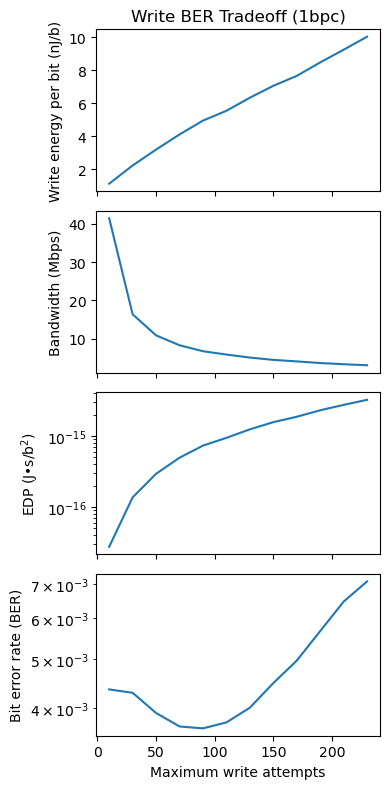

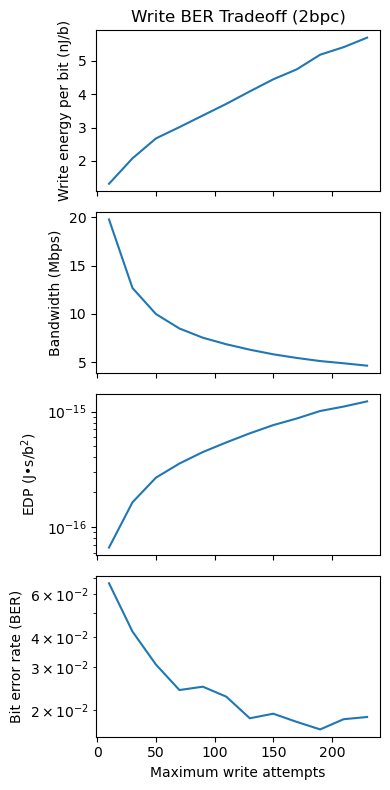

In [33]:
# Plot write BER tradeoff vs. attempts
for bpc in range(1, 3):
    d = data[data["bpc"] == bpc]
    fig, axs = plt.subplots(4, 1, figsize=(4,8), sharex=True)
    plt.xlabel("Maximum write attempts")
    axs[0].set_title(f"Write BER Tradeoff ({bpc}bpc)")
    axs[0].plot(d["att"], d["energy_per_bit"]*1e9)
    axs[0].set_ylabel("Write energy per bit (nJ/b)")
    axs[1].plot(d["att"], d["bw"]/1e6)
    # axs[1].set_yscale("log")
    axs[1].set_ylabel("Bandwidth (Mbps)")
    axs[2].plot(d["att"], d["edp_per_bit"])
    axs[2].set_yscale("log")
    axs[2].set_ylabel("EDP (J•s/b$^2$)")
    axs[3].plot(d["att"], d["ber"])
    axs[3].set_yscale("log")
    axs[3].set_ylabel("Bit error rate (BER)")
    plt.tight_layout()
    plt.savefig(f"../analysis/figs/{bpc}bpc_write_ber_tradeoff.pdf")
    plt.show()